<a href="https://colab.research.google.com/github/JITHINKVT/AI_ML_COURSE_ICTAK_JITHIN/blob/main/Manappuram_Day16_outlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#path to the file we are exploring
filepath = '/content/Bengaluru_House_Data.csv'
df = pd.read_csv(filepath)



In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1294,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,541,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [8]:
for col in df.columns:
  print(col,"--->" ,df[col].nunique())

area_type ---> 4
availability ---> 81
location ---> 1294
size ---> 31
society ---> 2688
total_sqft ---> 2117
bath ---> 19
balcony ---> 4
price ---> 1994


In [10]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


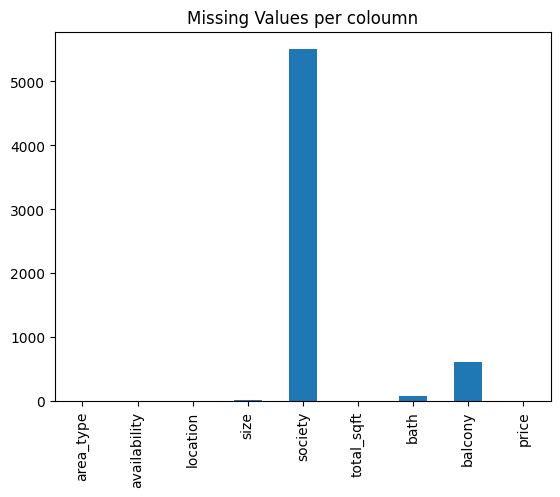

In [9]:
df.isnull().sum().plot(kind='bar')
plt.title("Missing Values per coloumn")
plt.show()

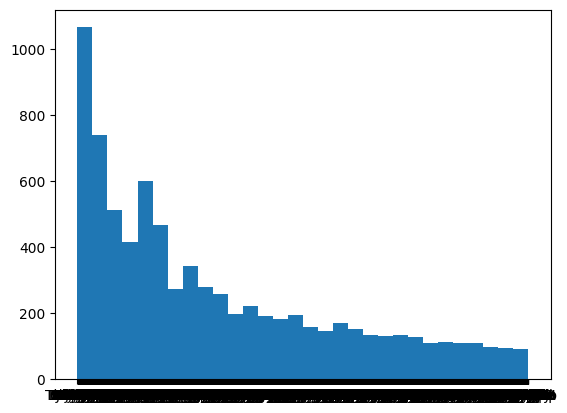

In [11]:
plt.hist(df['society'].dropna(),bins=30)
plt.show()

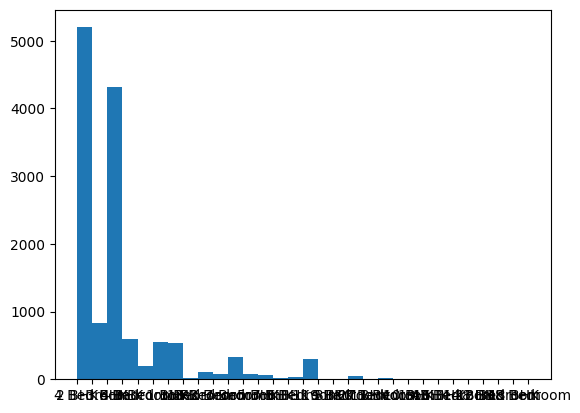

In [12]:
plt.hist(df['size'].dropna(),bins=30)
plt.show()

In [17]:
df['bath']=df['bath'].fillna(df['bath'].median())


In [18]:
df['balcony']=df['balcony'].fillna(df['balcony'].median())


In [19]:
categorical_cols=df.select_dtypes(include="object").columns
for col in categorical_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [20]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


Outlier Detection and Removal

In [21]:
import seaborn as sns

In [22]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [30]:
Q1 = df['bath'].quantile(0.25)
Q2 = df['bath'].quantile(0.50)
Q3 = df['bath'].quantile(0.75)

IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [31]:
df = df[(df['bath']>=lower) & (df['bath']<=upper)]

Encoding

In [ ]:
#Label Encoding

In [32]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00


In [33]:
df['size'].nunique()

17

In [34]:
df['availability'].nunique()

81

In [35]:
df['area_type'].nunique()

4

In [36]:
#Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['area_type'] = le.fit_transform(df['area_type'])

In [38]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,0,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00
5,3,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00


In [45]:
#One-hot Encoding
df = pd.get_dummies(df,columns=['size'],dtype='int64')

KeyError: "None of [Index(['size'], dtype='object')] are in the [columns]"

In [46]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,size_1 BHK,size_1 Bedroom,...,size_4 BHK,size_4 Bedroom,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom
0,3,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,Ready To Move,Uttarahalli,GrrvaGr,1440,2.0,3.0,62.00,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,Ready To Move,Kothanur,GrrvaGr,1200,2.0,1.0,51.00,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,Ready To Move,Whitefield,DuenaTa,1170,2.0,1.0,38.00,False,False,...,False,False,False,False,False,False,False,False,False,False
